In [1]:
import numpy as np
from numpy.random import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def pm(N): return (random(N)<0.5)*2 - 1
def betap(N, alpha=0.2): return  beta(alpha, alpha+1, N) 
def betan(N, alpha=0.2): return  -betap(N, alpha) 
def betapn(N, alpha=0.2): return  betap(N, alpha) * pm(N)
def unifp(N, alpha=0.2): return (random(N)<alpha) * random(N)
def unifn(N, alpha=0.2): return -unifp(N, alpha)
def unifpn(N, alpha=0.2): return unifp(N, alpha) * pm(N)
def binp(N, alpha=0.2): return (random(N)<alpha)
def binn(N, alpha=0.2): return -1 * binp(N, alpha)
def binpn(N, alpha=0.2): return binp(N, alpha) * pm(N)

In [4]:
print("betap", 0.2,  betap(100000).mean())
print("betapn", 0.2,  betapn(100000).mean())
print("unifp", 0.2,  unifp(100000).mean())
print("unifpn", 0.2,  unifpn(100000).mean())
print("binp", 0.2,  binp(100000).mean())
print("binpn", 0.2,  binpn(100000).mean())

betap 0.2 0.14212852279532381
betapn 0.2 -0.0009558088415979171
unifp 0.2 0.10058947538000292
unifpn 0.2 -2.3789735894516397e-05
binp 0.2 0.20074
binpn 0.2 -0.00046


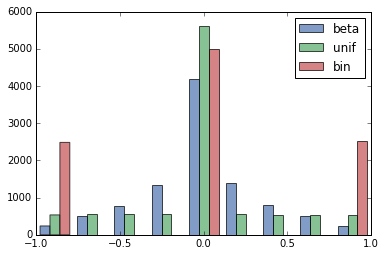

In [7]:

plt.style.use('seaborn-deep')

x = betapn(10000, 0.5)
y = unifpn(10000, 0.5)
z = binpn(10000, 0.5)
data = np.vstack([x, y, z]).T
bins = np.linspace(-1, 1, 10)

plt.hist(data, bins, alpha=0.7, label=['beta', 'unif', 'bin'])
plt.legend(loc='upper right')
plt.show()


In [18]:
def mixup(X, alpha, fun, X2=0, mode=None):
    s = X.shape
    if X2=='shuffle': X2 = X[permutation(len(X))]
    if mode is not None:
        if mode=='channel': s = s[:1] + tuple([1]*(len(s)-2)) + s[-1:]
        else: s = s[:mode] + tuple([1]*(len(s)-mode))
    print("mixup shape", s)
    return X + fun(s, alpha)*(X-X2)

In [9]:
def shake_shake(X1, X2, mode=None):
    return mixup(X1, 1.0, unifn, X2, mode=mode)
def shake_shake_unbiased(X1, X2, mode=None):
    return mixup(X1, 1.0, unifpn, X2, mode=mode)
def shake_1branch(X, alpha, mode=None):
    return mixup(X, alpha, unifp,  mode=mode)
def shake_1branch_unbiased(X, alpha, mode=None):
    return mixup(X, alpha, unifpn,  mode=mode)

In [10]:
print("shake shake biased", shake_shake(np.zeros((50,4,3,20)), np.ones((50,4,3,20) )).mean())
print("shake shake unbiased", shake_shake_unbiased(np.zeros((50,4,3,20)), np.ones((50,4,3,20) )).mean())

mixup shape (50, 4, 3, 20)
shake shake biased 0.49546292813775367
mixup shape (50, 4, 3, 20)
shake shake unbiased -0.004826973953150659


/Users/arunpatala/thenv/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
print("shake_1branch biased", shake_1branch(np.ones((50,4,3,20)), 0.2 ).mean())
print("shake_1branch unbiased", shake_1branch_unbiased(np.ones((50,4,3,20)), 0.2 ).mean())

mixup shape (50, 4, 3, 20)
shake_1branch biased 1.1021411498604943
mixup shape (50, 4, 3, 20)
shake_1branch unbiased 1.000039117255055


In [12]:
def stochastic_drop(X, alpha, mode=0):
    return mixup(X, alpha, binn,  mode=mode)  
def stochastic_drop_unbiased(X, alpha, mode=0):
    return mixup(X, alpha, binpn,  mode=mode)    
def shake_drop(X, alpha, mode=0):
    return mixup(X, alpha, unifn,  mode=mode)  
def shake_drop_unbiased(X, alpha, mode=0): 
    return mixup(X, alpha, unifpn,  mode=mode) 

mixup shape (50, 4, 3, 20)
stochastic_drop biased 0.8013333333333333
mixup shape (50, 4, 3, 20)
stochastic_drop unbiased 0.99575


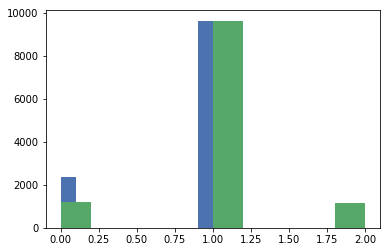

In [337]:
X = stochastic_drop(np.ones((50,4,3,20)), 0.2 , mode=None)
plt.hist(X.flatten());
print("stochastic_drop biased", X.mean())
X = stochastic_drop_unbiased(np.ones((50,4,3,20)), 0.2 , mode=None)
plt.hist(X.flatten());
print("stochastic_drop unbiased", X.mean())

mixup shape (50, 4, 3, 20)
shake_drop 0.9041457628381019
mixup shape (50, 4, 3, 20)
shake_drop_unbiased 0.9987142914057213


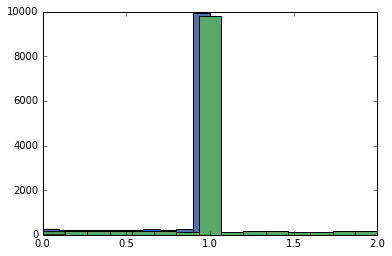

In [13]:

X = shake_drop(np.ones((50,4,3,20)), 0.2 , mode=None)
plt.hist(X.flatten());
print("shake_drop", X.mean())
X = shake_drop_unbiased(np.ones((50,4,3,20)), 0.2 , mode=None)
plt.hist(X.flatten(), bins=15);
print("shake_drop_unbiased", X.mean())

In [14]:
def mixup_layer(X1, alpha, X2='shuffle', mode=1):
    return mixup(X1, alpha, betan, X2=X2, mode=mode)
def mixup_layer_unbiased(X1, alpha, X2='shuffle', mode=1):
    return mixup(X1, alpha, betapn, X2=X2, mode=mode)

/Users/arunpatala/thenv/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until


mixup shape (50, 4, 1, 1)
mixup biased 0.8606771267567307
mixup shape (50, 4, 1, 1)
mixup unbiaed 0.9903530479955304


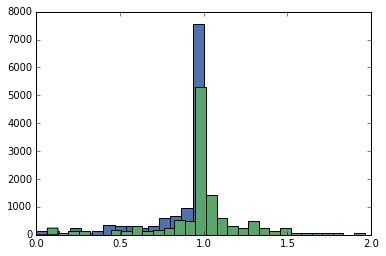

In [15]:
X = np.ones((50,4,3,20))
X = mixup(X, 0.2, betan, X2=np.zeros((50,4,3,20)), mode=2)
plt.hist(X.flatten(), bins=15);
print("mixup biased", X.mean())
X = np.ones((50,4,3,20))
X = mixup(X, 0.2, betapn, X2=np.zeros((50,4,3,20)), mode=2)
plt.hist(X.flatten(), bins=30);
print("mixup unbiaed", X.mean())

In [16]:
def dropout(X1, alpha, mode='channel'):
    return mixup(X1, alpha, binn, mode=mode)
def dropout_unbiased(X1, alpha, mode='channel'):
    return mixup(X1, alpha, binpn, mode=mode)
def dropout_unif(X1, alpha, mode='channel'):
    return mixup(X1, alpha, unifpn, mode=mode)
def dropout_beta(X1, alpha, mode='channel'):
    return mixup(X1, alpha, betapn, mode=mode)

mixup shape (50, 20)
mixup biased 0.838
mixup shape (50, 20)
mixup unbiased 0.999
mixup shape (50, 20)
mixup unif unbiased 0.9991632073619223
mixup shape (50, 20)
mixup beta unbiased 0.9950537164318422


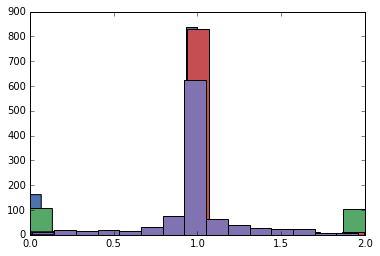

In [17]:
X = np.ones((50,20))
X = dropout(X, 0.2)
plt.hist(X.flatten(), bins=15);
print("mixup biased", X.mean())

X = np.ones((50,20))
X = dropout_unbiased(X, 0.2)
plt.hist(X.flatten(), bins=15);
print("mixup unbiased", X.mean())

X = np.ones((50,20))
X = dropout_unif(X, 0.2)
plt.hist(X.flatten(), bins=15);
print("mixup unif unbiased", X.mean())

X = np.ones((50,20))
X = dropout_beta(X, 0.2)
plt.hist(X.flatten(), bins=15);
print("mixup beta unbiased", X.mean())